In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Primera parte

Considerando el modelo Integrate-and-Fire para la evolución termporal del potencial de membrana entre el interior y el exterior de una neurona genérica, la ecuación diferencial del modelo **sin activar el mecanismo de disparo**:

$$\dfrac{dV_m(t)}{dt} = \dfrac{1}{\tau_m}(E_L-V_m(t)+R_m I_e(t))$$

a) Estudio geométrico de la dinámica de la ecuación para tiempos largos ($t \rightarrow \infty$) considerando el caso en que $I_e=0$

In [3]:
tau = 10 #ms
El = -65 #mV

def V(v):
    return ((1/tau)*(El-v))

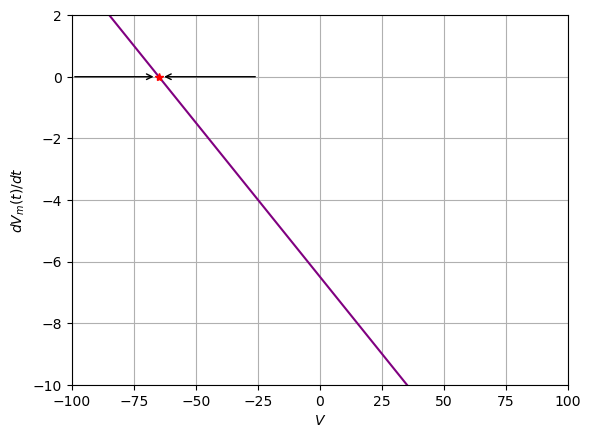

In [4]:
#gráfico 1

v = np.linspace(-100, 100)
y = V(v)
plt.xlabel("$V$")
plt.ylabel("$dV_m(t)/dt$")
plt.ylim(-10, 2)
plt.xlim(-100, 100)
plt.plot(v,y,color='purple',linestyle='-') 
plt.grid(True)

plt.plot(-65,0, marker = '*', color = 'red')

plt.annotate("", xy=(-64,0), xytext=(-25,0),arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(-66,0), xytext=(-100,0), arrowprops=dict(arrowstyle="->"))

plt.savefig('PuntoA.pdf')
plt.show()


b) Ahora para un $I_e=2$, la gráfica se como desplazada dado que para tiempos largos el punto fijo es $V_m=E_L+I_eR_m$

In [6]:
tau = 10 #ms
El = -65 #mV
Ie = 2 #nA
Rm = 10 #Momega
p = np.array([tau,El,Rm,Ie])

def f(x0,t,p):
    return ((1/p[0])*(p[1]-x0+p[3]*p[2]))

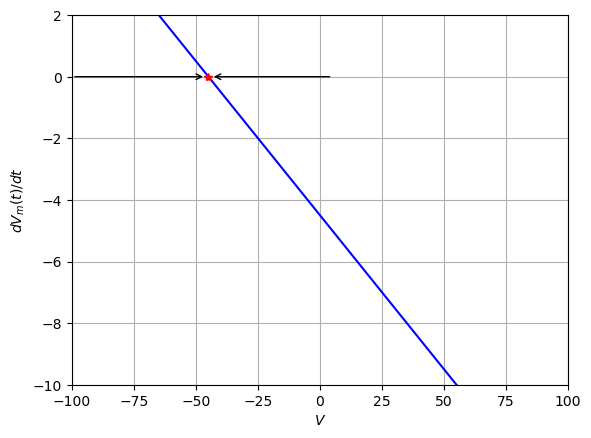

In [7]:
v = np.linspace(-100,100)
y = f(v,t,p)
plt.xlabel("$V$")
plt.ylabel("$dV_m(t)/dt$")
plt.ylim(-10, 2)
plt.xlim(-100,100)

plt.plot(v,y,c='blue',ls='-') 
plt.grid(True)
plt.plot(-45,0, marker = '*', color = 'r')

plt.annotate("", xy=(-44,0), xytext=(5, 0.0),arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(-46,0), xytext=(-100,0.0), arrowprops=dict(arrowstyle="->"))

plt.savefig('PuntoB.pdf')
plt.show()

Puntos d) y e), cálculo de la solución exacta y aproximación numérica con RK4, utilizando los algortimos provistos por la materia, rk4 y el integrador_ode 

In [8]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [9]:
def integrador_ode(m,f,x0,a,b,k,p):
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros((k+1))
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

In [10]:
tau = 10 #ms
El = -65 #mV
Ie = 2 #nA
Rm = 10 #Momega
p = np.array([tau,El,Rm,Ie])

def V_exact(x0,t,p):
    return np.exp(-t/p[0])*(x0-p[1]-p[2]*p[3])+p[2]*p[3]+p[1]


In [72]:
t_i = np.array([i for i in range(0, 201)])

In [75]:
v = [V_exact(-65,j,p) for j in t_i]

In [ ]:
m = rk4
f = f
x0 = np.array([-65.0])
a = 0 #ms
b = 200 #ms
k = 4000 
p = np.array([tau,El,Rm,Ie])

t,x = integrador_ode(m,f,x0,a,b,k,p)

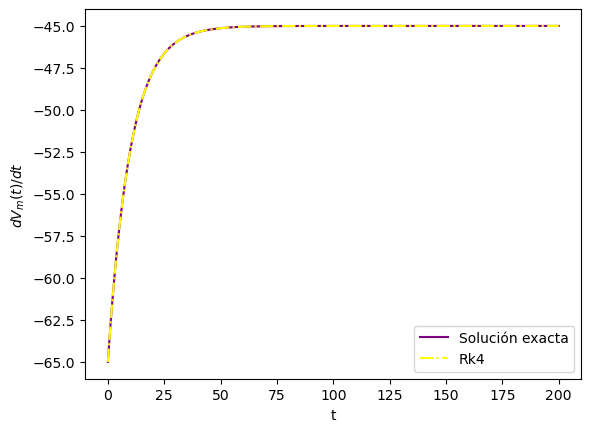

In [79]:
#Solución exacta 
plt.xlabel('t')
plt.ylabel('$dV_m(t)/dt$')
plt.plot(t_i,v, color = 'purple', linestyle = '-', label='Solución exacta')

#Rk4
plt.plot(t, x[0,:], color = 'yellow', ls = '-.', label='Rk4')

plt.legend()

plt.savefig('Sol-exacta-rk4.pdf')
plt.show()

## Segunda parte

f),g) e i) Se activa el mecanismo de disparo, para el primer punto $I_e=2$, para el segundo $Ie = 2.5*cos(t/30)$ y para el último inciso se define a $I_e$ dentro del while para que itere todo junto.

In [ ]:
tau = 10.0 #ms
El = -65.0 #mV
#Ie = 2.0 #nA 
Rm = 10.0 #Momega
h = 0.05 #ms
Vum = -50.0 #mV

v = []
w = []
V = El
t = 0
while t<=200: 
    Ie = 2.5*np.cos(t/30)
    #Ie = 0.35*(np.cos(t/3)+np.sin(t/5)+np.cos(t/7)+np.sin(t/11)+np.cos(t/13))**2
    V += h*((1/tau)*(El-V+Rm*Ie))
    t += h
    if V > Vum:
        V = El
    v.append(V)
    w.append(t)
    print(v,w)

[-64.875] [0.05]
[-64.875, -64.75062517361107] [0.05, 0.1]
[-64.875, -64.75062517361107, -64.62687274218682] [0.05, 0.1, 0.15000000000000002]
[-64.875, -64.75062517361107, -64.62687274218682, -64.50373994097264] [0.05, 0.1, 0.15000000000000002, 0.2]
[-64.875, -64.75062517361107, -64.62687274218682, -64.50373994097264, -64.38122401903526] [0.05, 0.1, 0.15000000000000002, 0.2, 0.25]
[-64.875, -64.75062517361107, -64.62687274218682, -64.50373994097264, -64.38122401903526, -64.25932223919274] [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3]
[-64.875, -64.75062517361107, -64.62687274218682, -64.50373994097264, -64.38122401903526, -64.25932223919274, -64.1380318779447] [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35]
[-64.875, -64.75062517361107, -64.62687274218682, -64.50373994097264, -64.38122401903526, -64.25932223919274, -64.1380318779447, -64.01735022540292] [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35, 0.39999999999999997]
[-64.875, -64.75062517361107, -64.62687274218682

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



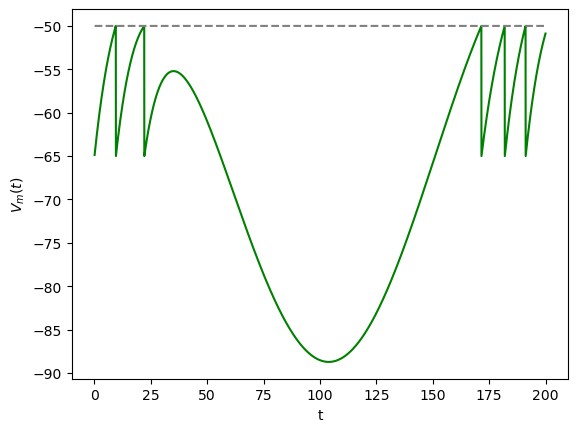

In [15]:
plt.xlabel('t')
plt.ylabel('$V_m(t)$')

plt.plot(w, v, color = 'green', ls = '-')
plt.plot(w, np.ones(len(w))*-50, color = 'grey', ls = '--')

plt.savefig('PuntoI.pdf')
plt.show()

h) Gráfico de la frecuencia del disparo para distintos valores de $I_e$ constantes

In [5]:
def frec(I):
    return 1/(-10*np.log(1+(-65+50)/(10*I)))
print(frec(2)) #frecuencia para un I=2 

0.07213475204444816


In [78]:
y = np.array([I/100.0 for I in range(0,1001)])
w = []
for I in y:
    if I < 1.5:
        f = 0
    else:
        f = frec(I)
    w.append(f)
print(w)   
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.019931118704250288, 0.023090777506376847, 0.02543347781440424, 0.027392320340717927, 0.029120667621996235, 0.030692767643013506, 0.03215087085462137, 0.033521573827849566, 0.034822826033053395, 0.03606737602222408, 0.037264639904214414, 0.03842179133350125, 0.039544434771587186, 0.04063704091178116, 0.04170323914242464, 0.042746020312811744, 0.043767881153043864, 0.04477092955334793, 0.04575696287782613, 0.04672752726328232, 0.04768396323191205, 0.04862744127236459, 0.04955898994721526, 0.050479518350490825, 0.051389834236975074, 0.0522

<ipython-input-5-f1fa9cafac00>:2: RuntimeWarning: divide by zero encountered in log
  return 1/(-10*np.log(1+(-65+50)/(10*I)))


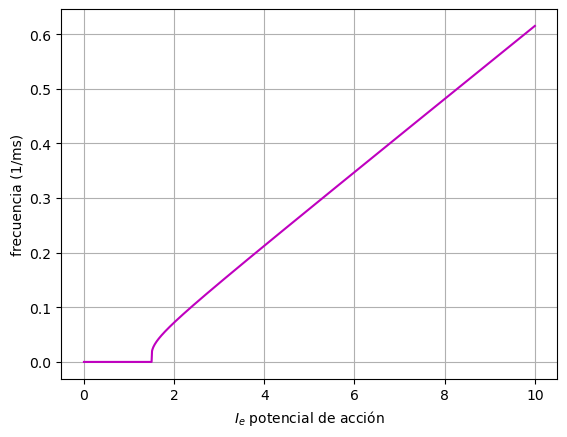

In [80]:
plt.plot(y, w, color = 'm', ls = '-')
plt.xlabel('$I_e$ potencial de acción')
plt.ylabel('frecuencia (1/ms)')
plt.grid()
plt.savefig('frec.pdf')
plt.show()

Modificando brevemente la función while, sacando los vectores vacios y pidiendo que me devuelva solo los valores de V y t, podemos conocer el tiempo en que la neurona tardo en llegar al umbral y volver a su potencial de reposo. Este tiempo fue de $t=13.850000000000062$.

In [108]:
#Frecuencia del disparo:
f = 1/13.850000000000062
print(f)

0.07220216606498163


In [76]:
-10*np.log(1-1)

<ipython-input-76-d4bc18f4a431>:1: RuntimeWarning: divide by zero encountered in log
  -10*np.log(1-1)


inf